## https://www.kaggle.com/c/hotdogornot/data
Classify images into those with hotdogs and images with other objects

In [1]:
import os
import shutil

from random import sample

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
import tensorflow as tf
import tensorflow.keras.backend as K

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# unzipped folder
path = "datasets/hot_dogs/"
train_dir = path + 'train/'
test_dir = path + 'test/'

train_gen_dir = path + 'train_gen/'
val_gen_dir = path + 'val_gen/'

train_hd = train_gen_dir + 'hd/'
train_nhd = train_gen_dir + 'nhd/'

val_hd = val_gen_dir + 'hd/'
val_nhd = val_gen_dir + 'nhd/'

In [4]:
#  divide images into different folders for keras image generator. 20% for validation

# for name in os.listdir(train_dir):
#     if any(x in name for x in ['frankfurter', 'chili-dog', 'hotdog']):
#         shutil.copyfile(train_dir + name, train_hd + name)
#     else:
#         shutil.copyfile(train_dir + name, train_nhd + name)


# val_hd_samples = int(len(os.listdir(train_hd)) * 0.2)
# for name in sample(os.listdir(train_hd), val_hd_samples):
#     shutil.move(train_hd + name, val_hd + name)
    
    
# val_nhd_samples = int(len(os.listdir(train_nhd)) * 0.2)
# for name in sample(os.listdir(train_nhd), val_nhd_samples):
#     shutil.move(train_nhd + name, val_nhd + name)

In [5]:
print(len(os.listdir(train_hd)), len(os.listdir(train_nhd)))
print(len(os.listdir(val_hd)), len(os.listdir(val_nhd)))

1156 2528
288 631


In [6]:
import matplotlib.image as mpimg
for i in os.listdir(train_hd)[:100]:
    img = mpimg.imread(train_hd + i)
    print(img.shape)

#plt.imshow(img)

(500, 375, 3)
(333, 500, 3)
(375, 500, 3)
(500, 375, 3)
(333, 500, 3)
(375, 500, 3)
(500, 375, 3)
(281, 500, 3)
(375, 500, 3)
(500, 375, 3)
(375, 500, 3)
(333, 500, 3)
(500, 335, 3)
(500, 338, 3)
(375, 500, 3)
(500, 332, 3)
(375, 500, 3)
(500, 375, 3)
(375, 500, 3)
(375, 500, 3)
(333, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(333, 500, 3)
(349, 500, 3)
(375, 500, 3)
(500, 375, 3)
(375, 500, 3)
(500, 333, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(307, 500, 3)
(375, 500, 3)
(500, 375, 3)
(500, 375, 3)
(375, 500, 3)
(375, 500, 3)
(350, 500, 3)
(334, 500, 3)
(375, 500, 3)
(332, 500, 3)
(333, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(334, 500, 3)
(375, 500, 3)
(375, 500, 3)
(249, 500, 3)
(399, 500, 3)
(375, 500, 3)
(500, 375, 3)
(375, 500, 3)
(335, 500, 3)
(333, 500, 3)
(333, 500, 3)
(274, 500, 3)
(333, 500, 3)
(332, 500, 3)
(333, 500, 3)
(333, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(500, 484, 3)
(500, 

In [7]:
imsize = 299  # default for InceptionV3

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')


val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_gen_dir,
        target_size=(imsize, imsize),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')  # 3684 images, 116 iters

val_generator = val_datagen.flow_from_directory(
        # This is the target directory
        val_gen_dir,
        target_size=(imsize, imsize),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')  # 919 images, 29 iters

Found 3684 images belonging to 2 classes.
Found 919 images belonging to 2 classes.


data batch shape: (32, 299, 299, 3)
labels batch shape: (32,)
1.0


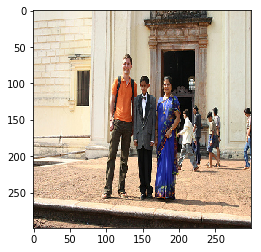

In [9]:
for data_batch, labels_batch in val_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[10])
    plt.imshow(data_batch[10])
    plt.show()
    break

data batch shape: (32, 299, 299, 3)
labels batch shape: (32,)
0.0


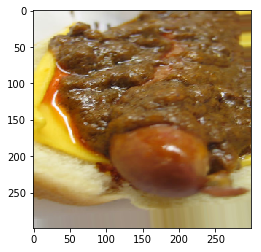

In [20]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    print(labels_batch[10])
    plt.imshow(data_batch[10])
    plt.show()
    break

So, 0 is for hotdogs, 1 - for not hotdogs. This has to be kept in mind

In [21]:
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [22]:
inc = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(imsize, imsize, 3))

model = models.Sequential()
model.add(inc)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation = 'sigmoid'))

inc.trainable = False

model.compile(loss = 'binary_crossentropy', metrics = ['acc', f1], optimizer = 'adam')

In [21]:
from tensorflow.keras import callbacks

cb = [callbacks.EarlyStopping(monitor='val_f1', patience=10, mode='max'), 
      callbacks.ModelCheckpoint('saved_models/hotdogs.hdf5', monitor='val_f1',
                                save_best_only=True, save_weights_only=True, mode='max')]

history = model.fit_generator(train_generator,
                              steps_per_epoch=116,
                              epochs=100,
                              validation_data=val_generator,
                              validation_steps=29, callbacks=cb)

Epoch 1/100
116/116 [==============================] - 77s 660ms/step - loss: 2.0931 - acc: 0.6821 - f1: 0.7893 - val_loss: 0.6833 - val_acc: 0.6866 - val_f1: 0.8122
Epoch 2/100
116/116 [==============================] - 65s 564ms/step - loss: 0.5879 - acc: 0.7049 - f1: 0.8199 - val_loss: 0.4587 - val_acc: 0.7149 - val_f1: 0.8262
Epoch 3/100
116/116 [==============================] - 66s 569ms/step - loss: 0.4780 - acc: 0.7136 - f1: 0.8253 - val_loss: 0.3872 - val_acc: 0.7301 - val_f1: 0.8323
Epoch 4/100
116/116 [==============================] - 66s 566ms/step - loss: 0.4402 - acc: 0.7595 - f1: 0.8446 - val_loss: 0.2471 - val_acc: 0.8303 - val_f1: 0.8878
Epoch 5/100
116/116 [==============================] - 66s 568ms/step - loss: 0.4034 - acc: 0.7562 - f1: 0.8437 - val_loss: 0.1818 - val_acc: 0.9010 - val_f1: 0.9315
Epoch 6/100
116/116 [==============================] - 66s 566ms/step - loss: 0.3601 - acc: 0.8252 - f1: 0.8809 - val_loss: 0.1951 - val_acc: 0.9075 - val_f1: 0.9347
Epoc

In [23]:
model.load_weights("saved_models/hotdogs.hdf5")
model.evaluate_generator(val_generator)

[0.12609785686022248, 0.9553863, 0.9675052]

In [24]:
for i in inc.layers:
    print(i.name)

input_1
conv2d
batch_normalization_v1
activation
conv2d_1
batch_normalization_v1_1
activation_1
conv2d_2
batch_normalization_v1_2
activation_2
max_pooling2d
conv2d_3
batch_normalization_v1_3
activation_3
conv2d_4
batch_normalization_v1_4
activation_4
max_pooling2d_1
conv2d_8
batch_normalization_v1_8
activation_8
conv2d_6
conv2d_9
batch_normalization_v1_6
batch_normalization_v1_9
activation_6
activation_9
average_pooling2d
conv2d_5
conv2d_7
conv2d_10
conv2d_11
batch_normalization_v1_5
batch_normalization_v1_7
batch_normalization_v1_10
batch_normalization_v1_11
activation_5
activation_7
activation_10
activation_11
mixed0
conv2d_15
batch_normalization_v1_15
activation_15
conv2d_13
conv2d_16
batch_normalization_v1_13
batch_normalization_v1_16
activation_13
activation_16
average_pooling2d_1
conv2d_12
conv2d_14
conv2d_17
conv2d_18
batch_normalization_v1_12
batch_normalization_v1_14
batch_normalization_v1_17
batch_normalization_v1_18
activation_12
activation_14
activation_17
activation_18
mix

In [25]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 inception_v3
1 flatten
2 dense
3 dropout
4 dense_1
5 dropout_1
6 dense_2


In [27]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD

inc = InceptionV3(weights='imagenet',
                  include_top=False,
                  input_shape=(imsize, imsize, 3))

for layer in inc.layers[:249]:
    layer.trainable = False
for layer in inc.layers[249:]:
    layer.trainable = True
    
model = models.Sequential()
model.add(inc)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='binary_crossentropy', metrics=['acc', f1])


cb = [callbacks.EarlyStopping(monitor='val_f1', patience=10, mode='max'), 
      callbacks.ModelCheckpoint('saved_models/hotdogs_finetuned.hdf5', monitor='val_f1',
                                save_best_only=True, save_weights_only=True, mode='max')]

history = model.fit_generator(train_generator,
                              steps_per_epoch=116,
                              epochs=100,
                              validation_data=val_generator,
                              validation_steps=29, callbacks=cb)

Epoch 1/100
116/116 [==============================] - 93s 804ms/step - loss: 0.4593 - acc: 0.7820 - f1: 0.8408 - val_loss: 0.1869 - val_acc: 0.9347 - val_f1: 0.9508
Epoch 2/100
116/116 [==============================] - 63s 545ms/step - loss: 0.2588 - acc: 0.8931 - f1: 0.9225 - val_loss: 0.1539 - val_acc: 0.9380 - val_f1: 0.9527
Epoch 3/100
116/116 [==============================] - 62s 539ms/step - loss: 0.2213 - acc: 0.9137 - f1: 0.9342 - val_loss: 0.1457 - val_acc: 0.9380 - val_f1: 0.9540
Epoch 4/100
116/116 [==============================] - 62s 535ms/step - loss: 0.2046 - acc: 0.9202 - f1: 0.9411 - val_loss: 0.1396 - val_acc: 0.9434 - val_f1: 0.9589
Epoch 5/100
116/116 [==============================] - 63s 541ms/step - loss: 0.1946 - acc: 0.9254 - f1: 0.9435 - val_loss: 0.1302 - val_acc: 0.9423 - val_f1: 0.9591
Epoch 6/100
116/116 [==============================] - 61s 530ms/step - loss: 0.1612 - acc: 0.9414 - f1: 0.9566 - val_loss: 0.1282 - val_acc: 0.9434 - val_f1: 0.9573
Epoc

In [28]:
model.load_weights("saved_models/hotdogs_finetuned.hdf5")
model.evaluate_generator(val_generator)

[0.11070969998675945, 0.96191514, 0.97210926]

In [61]:
image_batch = val_generator.next()
image_batch[0].shape

(32, 299, 299, 3)

In [62]:
predictions = model.predict_classes(image_batch[0])
predictions = predictions.reshape((-1, ))

1 1.0


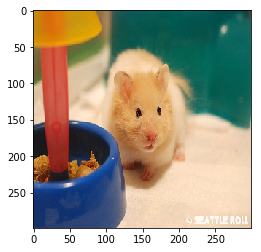

0 0.0


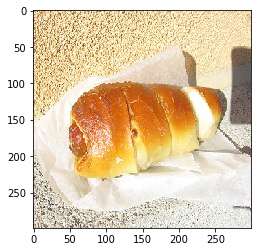

1 1.0


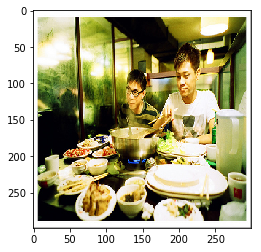

1 1.0


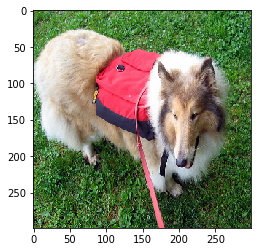

1 1.0


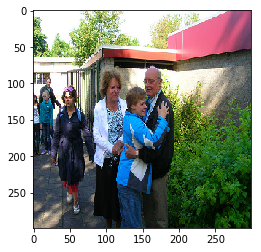

1 1.0


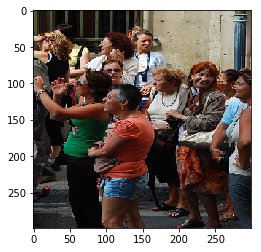

1 1.0


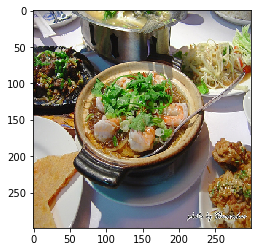

1 1.0


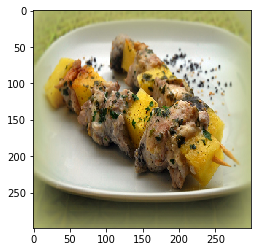

0 0.0


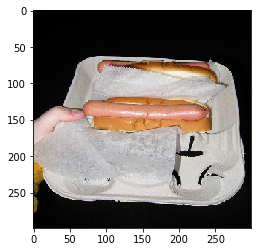

0 1.0


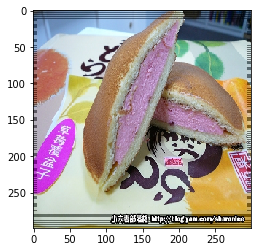

1 1.0


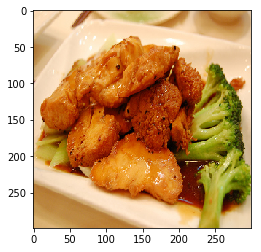

0 0.0


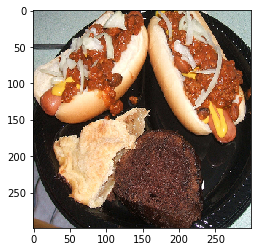

1 1.0


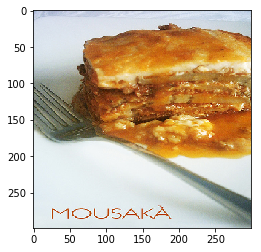

1 1.0


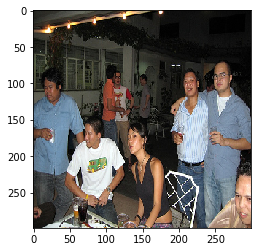

1 1.0


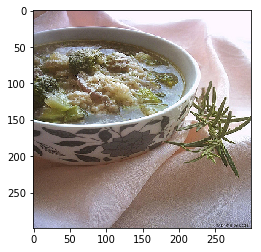

1 0.0


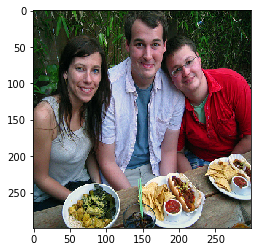

1 1.0


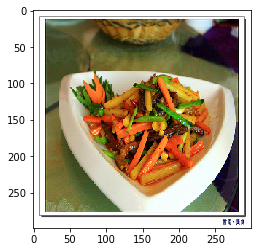

1 1.0


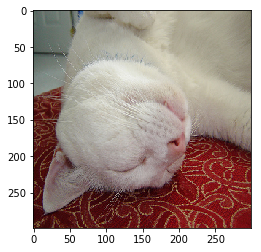

0 0.0


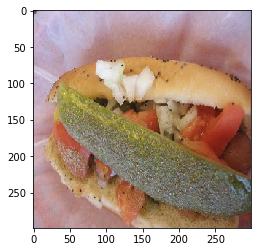

1 1.0


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [63]:
for i in range(image_batch[0].shape[0]):
    print(predictions[i], image_batch[1][i])
    plt.imshow(image_batch[0][i])
    plt.show()